In [5]:

from lib.constants import *
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

PATH_SENTIMENT_GRAPH = 'sentiment_graphs/'
os.makedirs(PATH_SENTIMENT_GRAPH, exist_ok=True)
PATH_REGARD_GRAPH = 'regard_graphs/'
os.makedirs(PATH_REGARD_GRAPH, exist_ok=True)
FONT_TITLE = 18
FONT_TICKS = 14
COLOR = 'color'
LINESTYLE = 'linestyle'
LABEL = 'label'
IBM_COLORBLINDPALETTE = ['#ffb000', '#fe6100', '#dc267f', '#785ef0', '#648fff']
MARKERS = ['o', "s", "^", "D", "X"]

MODELS_GRAPHICS = {
    BERT_BASE : {
        LABEL: 'BERT Base',
        COLOR: '#ffb000', 
        LINESTYLE: '-'
    },
    BERT_LARGE : {
        LABEL: 'BERT Large',
        COLOR: '#ffb000', 
        LINESTYLE: '--'
    },
    LLAMA3 : {
        LABEL: 'Llama 3',
        COLOR: '#785ef0', 
        LINESTYLE: '-'
    },
    LLAMA3_70B : {
        LABEL: 'Llama 3 (70b)',
        COLOR: '#785ef0', 
        LINESTYLE: '--'
    },
    GEMMA3 : {
        LABEL: 'Gemma 3',
        COLOR: '#dc267f', 
        LINESTYLE: '-'
    },
    GEMMA3_27B : {
        LABEL: 'Gemma 3 (27b)',
        COLOR: '#dc267f', 
        LINESTYLE: '--'
    },
    GEMINI_2_0_FLASH_LITE : {
        LABEL: "Gemini 2.0 Flash Lite",
        COLOR: '#fe6100', 
        LINESTYLE: '-'
    },
    GEMINI_2_0_FLASH : {
        LABEL: "Gemini 2.0 Flash",
        COLOR: '#fe6100', 
        LINESTYLE: '--'
    },
    GPT4_MINI : {
        LABEL: 'GPT4o Mini',
        COLOR: '#648fff', 
        LINESTYLE: '-'
    },
    GPT4 : {
        LABEL: 'GPT4o',
        COLOR: '#648fff', 
        LINESTYLE: '--'
    },
    DEEPSEEK: {
        LABEL: 'DeepSeek R1',
        COLOR: '#000000', 
        LINESTYLE: '-'
    },
    DEEPSEEK_673B: {
        LABEL: 'DeepSeek R1 (671b)',
        COLOR: '#000000', 
        LINESTYLE: '--'
    }
}

{'BERT_base': {'Unmarked': [0.02976734735344915,
   0.7696840394188763,
   0.20054861322767456],
  'Non Queer': [0.11036084646296467, 0.7264514537662257, 0.16318769977080955],
  'Queer': [0.12604765817584224, 0.6807723911257189, 0.19317995069843877]},
 'BERT_large': {'Unmarked': [0.048882967821274846,
   0.6573068251690921,
   0.2938102070096331],
  'Non Queer': [0.1779661885771112, 0.6552321587845111, 0.16680165263837768],
  'Queer': [0.2214682200023577, 0.624303587262374, 0.1542281927352683]},
 'RoBERTa_base': {'Unmarked': [0.15548466762708374,
   0.5871578514097551,
   0.25735748096316113],
  'Non Queer': [0.26407110484230617, 0.5718048972734154, 0.16412399788427834],
  'Queer': [0.24911860469939234, 0.5786671229183518, 0.17221427238225592]},
 'RoBERTa_large': {'Unmarked': [0.09405991207443003,
   0.644412636744709,
   0.2615274511808609],
  'Non Queer': [0.2025295424809454, 0.6173495877551868, 0.18012086976386782],
  'Queer': [0.21878713346513276, 0.6207755413378166, 0.160437325197

{'llama3': {'Unmarked': [0.08898614150255287,
   0.765760133375013,
   0.1452537251224341],
  'Non Queer': [0.131387623783061, 0.6920987757489658, 0.1765136004679731],
  'Queer': [0.14103728303453286, 0.6992034870145033, 0.15975922995096387]},
 'deepseek-reasoner': {'Unmarked': [0.06923552441788584,
   0.7218215536781372,
   0.20894292190397698],
  'Non Queer': [0.24025960025011317, 0.5648892817870157, 0.19485111796287113],
  'Queer': [0.13685485470852957, 0.638353189312228, 0.2247919559792425]},
 'gpt-4o': {'Unmarked': [0.1312023399143424,
   0.6660399038963752,
   0.20275775618928243],
  'Non Queer': [0.23938364604652657, 0.589018784222539, 0.1715975697309345],
  'Queer': [0.1171465866482222, 0.6895974288700861, 0.1932559844816916]},
 'gemini-2.0-flash': {'Unmarked': [0.11370860248128782,
   0.7291089921049932,
   0.15718240541371886],
  'Non Queer': [0.19614205877050664, 0.6388827028918652, 0.1649752383376282],
  'Queer': [0.11613079891913673, 0.7485546295770064, 0.13531457150385687

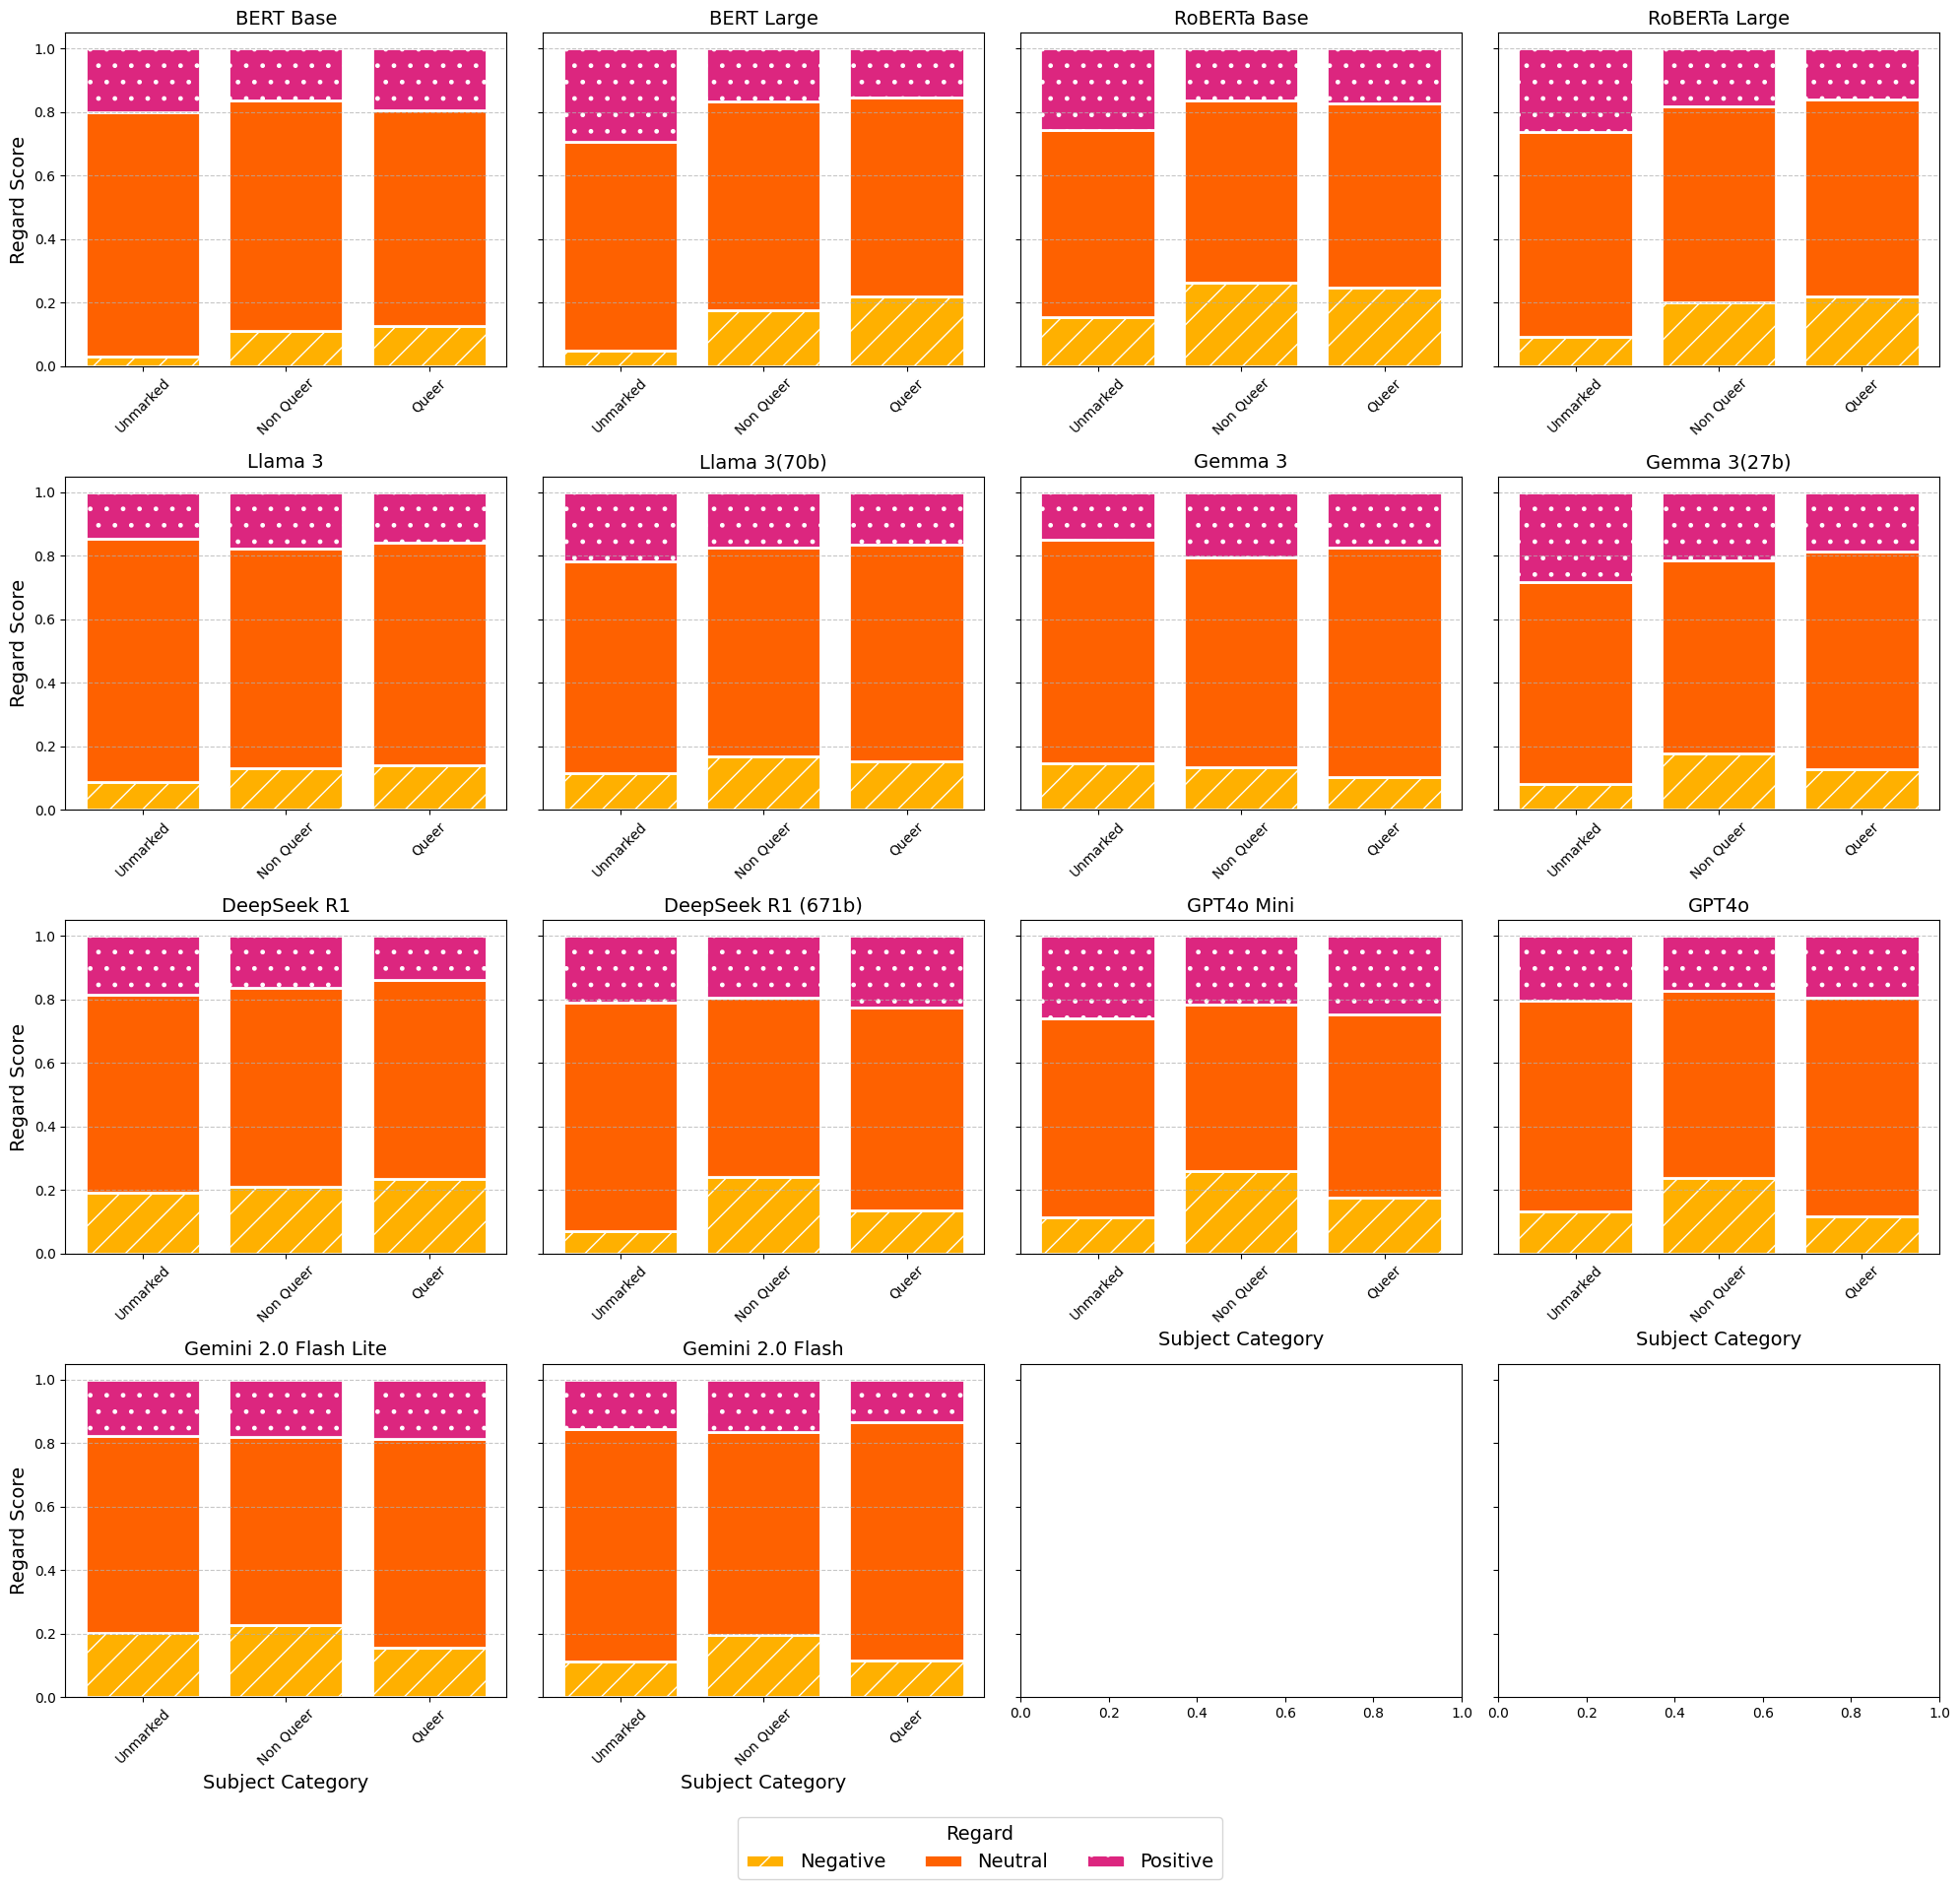

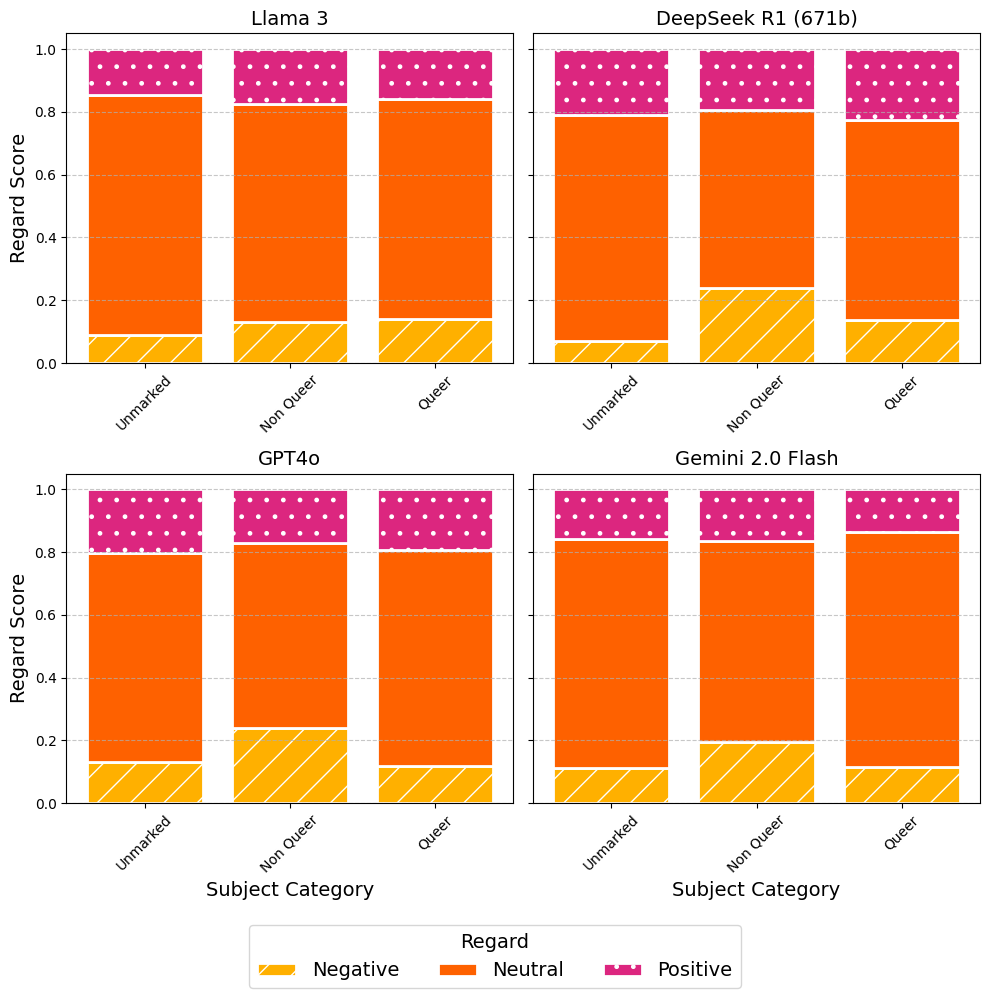

In [13]:
def plot_stacked_bars_per_model(models, img_name, models_per_row):            
    study = {}
    y_points_list =[]
    for model in models:
        data = pd.read_csv(f"{OUTPUT_EVALUATION+model}.csv") 
        y_points =[]
        for subjCat in SUBJ_CATEGORIES:
            df = data[data[TYPE] == subjCat].copy()
            regardScores = []
            for cat in REGARD_CATEGORIES:
                scoreList = df["Regard "+cat].dropna().tolist() #Get the scores for that subject category
                scoreList = np.mean(scoreList) #Calculate the mean for that subject category scores
                regardScores.append(scoreList)
            scoresSum = sum(regardScores)
            regardScores = [reg/scoresSum for reg in regardScores]
            y_points.append(regardScores)
        y_points_list.append(y_points)
        study[model] = {cat: point for cat, point in zip(SUBJ_CATEGORIES, y_points)}
    display(study)
    
    #title="Regard Scores on the subject category's scores accross models"
    n_models = len(study)
    num_cols = min(models_per_row, n_models)  # Max 3 per row
    num_rows = math.ceil(n_models / num_cols)  # Calculate required rows

    # Create subplots dynamically
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows), sharey=True)
    #fig, axes = plt.subplots(1, n_models, figsize=(5 * n_models, 6), sharey=True)
    axes = np.array(axes).flatten()
    
    if n_models == 1:
        axes = [axes]  # Make axes iterable if there's only one model

    for idx, (ax, (model_name, category_data)) in enumerate(zip(axes, study.items())):
        bar_positions = np.arange(len(SUBJ_CATEGORIES))
        bottoms = np.zeros(len(SUBJ_CATEGORIES))  # Track the bottom of the stacks

        for stack_idx in range(len(REGARD_CATEGORIES)):
            # Heights of the current stack for each subject
            heights = [category_data[subj][stack_idx] for subj in SUBJ_CATEGORIES]
            patterns = [ "/" , "", "."] #"\\" , "|" , "-" , "+" , "x", "o", "O", "*" 
            ax.bar(bar_positions, heights, bottom=bottoms, color=IBM_COLORBLINDPALETTE[stack_idx], label=REGARD_CATEGORIES[stack_idx], hatch=patterns[stack_idx], edgecolor='white', linewidth=2)
            bottoms += heights

        ax.set_title(MODELS_LABELS[model_name], fontsize=FONT_TICKS)
        ax.set_xticks(bar_positions)
        ax.set_xticklabels(SUBJ_CATEGORIES, rotation=45)
        #ax.set_xlabel('Subject Category', fontsize=FONT_TICKS)
        ax.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

        if (len(models) - idx - models_per_row) <= 0:        
            #ax.set_xlabel("Category", size=FONT_TICKS)
            ax.set_xlabel("Subject Category", size = FONT_TICKS)
            
        if (idx % models_per_row) == 0:
            ax.set_ylabel("Regard Score", size=FONT_TICKS)

    # Create a single legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title="Regard",  title_fontsize=FONT_TICKS, fontsize=FONT_TICKS,loc='upper center', bbox_to_anchor=(0.5, 0), ncol=len(REGARD_CATEGORIES))
    
    #plt.suptitle(title, fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    #plt.show()
    plt.savefig(PATH_REGARD_GRAPH+img_name+'.png', bbox_inches = 'tight')

plot_stacked_bars_per_model([BERT_BASE, BERT_LARGE, ROBERTA_BASE, ROBERTA_LARGE, 
                             LLAMA3, LLAMA3_70B, GEMMA3, GEMMA3_27B, DEEPSEEK, DEEPSEEK_673B, GPT4_MINI, GPT4,GEMINI_2_0_FLASH_LITE, GEMINI_2_0_FLASH], "all", 4)
plot_stacked_bars_per_model([LLAMA3, DEEPSEEK_673B, GPT4, GEMINI_2_0_FLASH], "examine", 2)